We begin by loading in and inspecting the dataset

In [43]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [44]:
# Load the dataset
df = pd.read_csv('dataset.csv')

In [45]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the columns of the dataset
print("\nColumns of the dataset:")
print(df.columns)

First few rows of the dataset:
   Unnamed: 0     area  perimeter  physiological_length  physiological_width  \
0           0  65025.0     1020.0                   256                  256   
1           1  65025.0     1020.0                   256                  256   
2           2  65025.0     1020.0                   256                  256   
3           3  65025.0     1020.0                   256                  256   
4           4  65025.0     1020.0                   256                  256   

   aspect_ratio  rectangularity  circularity  major_axis  minor_axis  ...  \
0           1.0        0.992203     0.785398         256         256  ...   
1           1.0        0.992203     0.785398         256         256  ...   
2           1.0        0.992203     0.785398         256         256  ...   
3           1.0        0.992203     0.785398         256         256  ...   
4           1.0        0.992203     0.785398         256         256  ...   

     mean_g    mean_b  st

In [46]:
#Remove unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [47]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
area                          0
perimeter                     0
physiological_length          0
physiological_width           0
aspect_ratio                  0
rectangularity                0
circularity                   0
major_axis                    0
minor_axis                    0
convex_area                   0
convex_ratio                  0
mean_r                        0
mean_g                        0
mean_b                        0
stddev_r                      0
stddev_g                      0
stddev_b                      0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
classlabel                    0
dtype: int64


In [48]:
# Print unique categories in the 'classlabel' column
unique_categories = df['classlabel'].unique()
print("Unique categories in the 'classlabel' column:")
for category in unique_categories:
    print(category)

Unique categories in the 'classlabel' column:
Bacterial_spot
Late_Blight
Leaf_mold
Septoria
yellow_leaf_curl


In [49]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['area', 'perimeter', 'physiological_length', 'physiological_width', 'aspect_ratio', 'rectangularity', 'circularity', 'major_axis', 'minor_axis', 'convex_area', 'convex_ratio', 'mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b', 'contrast', 'correlation', 'inverse_difference_moments', 'entropy']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

We can attempt to run the RandomForest CLassifier now, considering our data is clean. We will one-hot encode the ClassLabel column however.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [58]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('classlabel', axis=1)
y = df['classlabel']

# Applying one-hot encoding to the categorical target variable
y_encoded = pd.get_dummies(y)

In [59]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [60]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rfc = accuracy_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
precision_rfc = precision_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
recall_rfc = recall_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
f1_rfc = f1_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Print metrics
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)

# Model evaluation
print("Classification Report:")
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), target_names=y_encoded.columns))

Accuracy: 0.43
Precision: 0.6051741282254713
Recall: 0.43
F1 Score: 0.444483343876249
Classification Report:
                  precision    recall  f1-score   support

  Bacterial_spot       0.24      0.75      0.37        56
     Late_Blight       0.89      0.37      0.52        65
       Leaf_mold       0.59      0.20      0.30        49
        Septoria       0.50      0.29      0.37        66
yellow_leaf_curl       0.76      0.53      0.62        64

        accuracy                           0.43       300
       macro avg       0.60      0.43      0.44       300
    weighted avg       0.61      0.43      0.44       300



In [61]:
# Initialize and train the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate metrics for KNN
accuracy_knn = accuracy_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1))
precision_knn = precision_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
recall_knn = recall_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
f1_knn = f1_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')

# Print metrics for KNN
print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

# Detailed classification report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), target_names=y_encoded.columns))

K-Nearest Neighbors Metrics:
Accuracy: 0.45
Precision: 0.5604335324612901
Recall: 0.45
F1 Score: 0.4582107204862202

Classification Report for Logistic Regression:
                  precision    recall  f1-score   support

  Bacterial_spot       0.27      0.71      0.40        56
     Late_Blight       0.75      0.32      0.45        65
       Leaf_mold       0.33      0.18      0.24        49
        Septoria       0.54      0.47      0.50        66
yellow_leaf_curl       0.81      0.53      0.64        64

        accuracy                           0.45       300
       macro avg       0.54      0.44      0.45       300
    weighted avg       0.56      0.45      0.46       300



In [62]:

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1))
precision_dt = precision_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
recall_dt = recall_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
f1_dt = f1_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')

# Print metrics for Decision Tree
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

# Detailed classification report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), target_names=y_encoded.columns))

Decision Tree Metrics:
Accuracy: 0.45666666666666667
Precision: 0.46864185746853004
Recall: 0.45666666666666667
F1 Score: 0.4603132208712314

Classification Report for Logistic Regression:
                  precision    recall  f1-score   support

  Bacterial_spot       0.44      0.45      0.44        56
     Late_Blight       0.60      0.48      0.53        65
       Leaf_mold       0.30      0.35      0.32        49
        Septoria       0.44      0.50      0.47        66
yellow_leaf_curl       0.53      0.48      0.50        64

        accuracy                           0.46       300
       macro avg       0.46      0.45      0.45       300
    weighted avg       0.47      0.46      0.46       300



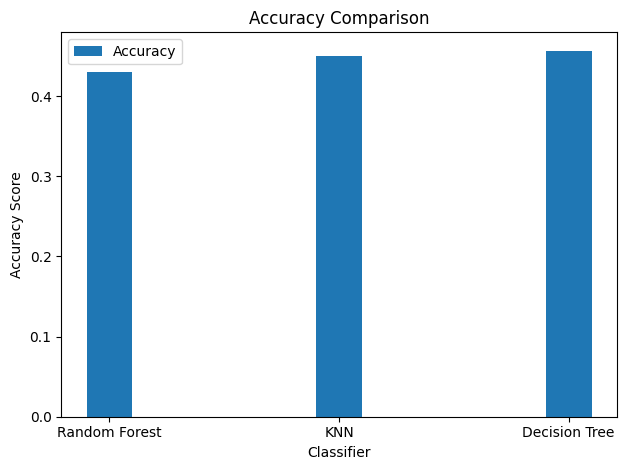

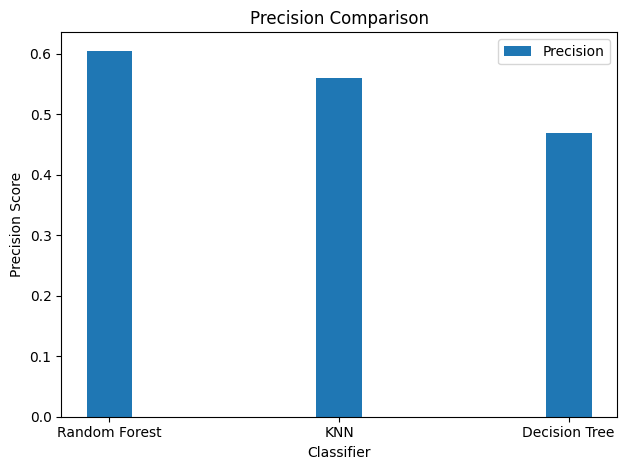

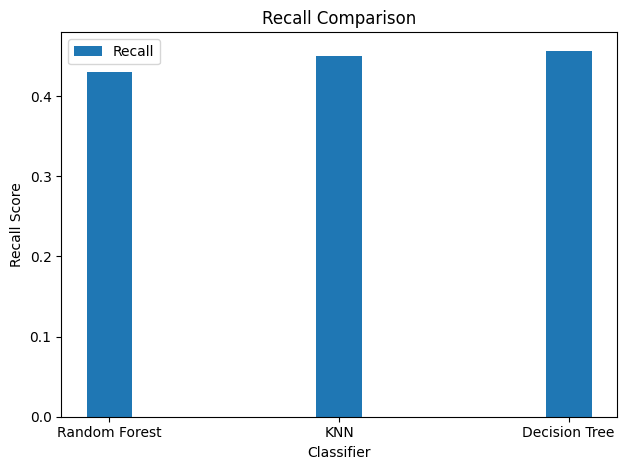

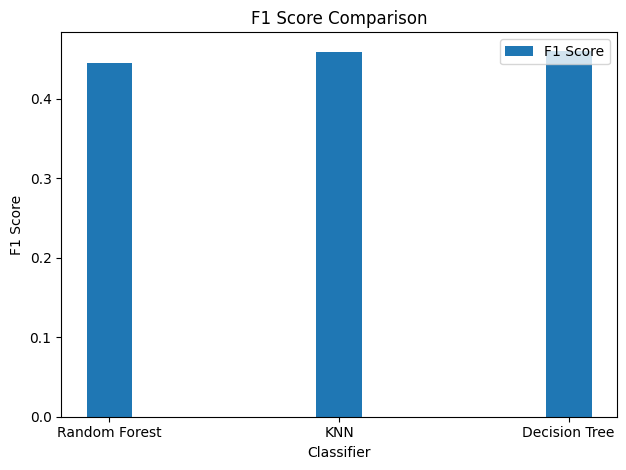

In [63]:
# Store the metrics in lists
classifiers = ['Random Forest', 'KNN', 'Decision Tree']
accuracy_scores = [accuracy_rfc, accuracy_knn, accuracy_dt]
precision_scores = [precision_rfc, precision_knn, precision_dt]
recall_scores = [recall_rfc, recall_knn, recall_dt]
f1_scores = [f1_rfc, f1_knn, f1_dt]

# Plotting the metrics
import matplotlib.pyplot as plt

# Bar width
bar_width = 0.2
index = range(len(classifiers))

# Plotting Accuracy
plt.bar(index, accuracy_scores, width=bar_width, label='Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Precision
plt.bar(index, precision_scores, width=bar_width, label='Precision')
plt.xlabel('Classifier')
plt.ylabel('Precision Score')
plt.title('Precision Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Recall
plt.bar(index, recall_scores, width=bar_width, label='Recall')
plt.xlabel('Classifier')
plt.ylabel('Recall Score')
plt.title('Recall Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting F1 Score
plt.bar(index, f1_scores, width=bar_width, label='F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.xticks(index, classifiers)
plt.legend()
plt.tight_layout()
plt.show()